In [1]:
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


<AxesSubplot:>

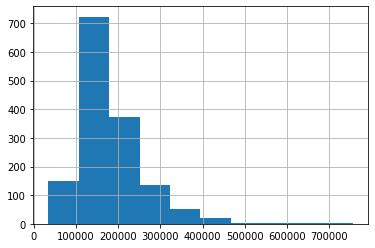

In [5]:
df['SalePrice'].hist()

In [6]:
####### REGRESSION ##########
from pycaret.regression import *

In [7]:
reg = setup(df, target='SalePrice')

,Description,Value
0,session_id,7088
1,Target,SalePrice
2,Original Data,"(1460, 81)"
3,Missing Values,True
4,Numeric Features,19
5,Categorical Features,61
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1021, 402)"


In [8]:
models = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,15748.3023,876561429.6633,28238.1172,0.8461,0.1283,0.0891,2.7300
ridge,Ridge Regression,18048.1266,943437321.6000,29727.7795,0.8309,0.1486,0.1043,0.0320
lightgbm,Light Gradient Boosting Machine,18427.7921,1037127702.0172,31217.6845,0.8251,0.1454,0.1040,0.1380
rf,Random Forest Regressor,18891.1625,1056448969.7086,31488.2370,0.8205,0.1551,0.1110,0.3870
gbr,Gradient Boosting Regressor,17836.5198,1019062215.9893,30266.5873,0.8164,0.1424,0.1033,0.1490
xgboost,Extreme Gradient Boosting,18827.1365,1089802323.2000,32065.3551,0.8119,0.1513,0.1079,0.7730
omp,Orthogonal Matching Pursuit,17387.7812,1051294320.1178,30631.0338,0.8060,0.1447,0.0984,0.2980
llar,Lasso Least Angle Regression,18049.1347,1087739658.3975,31538.7562,0.8056,0.1576,0.1022,0.6170
en,Elastic Net,20093.1429,1125202265.6000,32440.8859,0.8036,0.1604,0.1181,0.0990
lasso,Lasso Regression,19778.5795,1242292249.6000,33964.3988,0.7772,0.1814,0.1143,0.3330


In [9]:
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,17356.5878,900533164.3773,30008.8848,0.8652,0.1155,0.0841
1,18900.3600,844760997.7457,29064.7725,0.8844,0.1425,0.1022
2,14956.3893,694768745.4459,26358.4663,0.8781,0.1139,0.0866
3,18405.3170,2433018421.6127,49325.6366,0.3842,0.1728,0.1108
4,13406.6748,372658377.2729,19304.3616,0.9406,0.1135,0.0837
5,16139.5398,1168806028.1110,34187.8053,0.8728,0.1179,0.0822
6,14258.6418,446388370.8894,21127.9050,0.9167,0.1355,0.0914
7,13372.6435,545900292.1683,23364.5092,0.9031,0.1152,0.0784
8,12774.4487,284186990.9274,16857.8466,0.9447,0.0977,0.0725
9,17912.4203,1074592908.0821,32780.9839,0.8717,0.1579,0.0994


In [10]:
tuned = tune_model(catboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,18180.2398,843777674.0095,29047.8515,0.8737,0.1196,0.0906
1,23319.6464,1227335673.8414,35033.3509,0.8320,0.1722,0.1290
2,16183.1135,855701464.3949,29252.3754,0.8499,0.1363,0.0971
3,18124.8906,1387463683.1090,37248.6736,0.6488,0.1637,0.1115
4,16920.5304,624936689.1818,24998.7338,0.9003,0.1389,0.1031
5,18458.2298,1318340757.8187,36308.9625,0.8566,0.1444,0.1022
6,17773.6149,687959242.5940,26228.9772,0.8716,0.1663,0.1143
7,15067.9437,611773595.1980,24734.0574,0.8914,0.1267,0.0883
8,14494.7504,357525152.7253,18908.3355,0.9305,0.1140,0.0857
9,21362.8966,1282008614.4592,35805.1479,0.8470,0.1790,0.1238


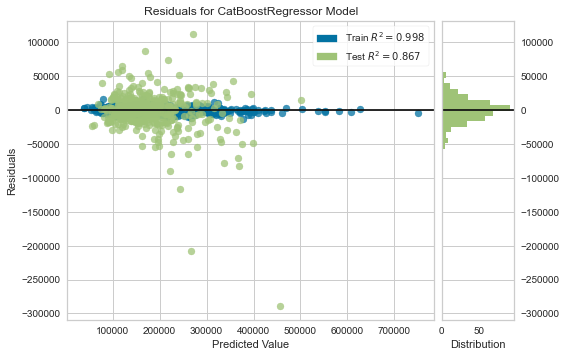

In [11]:
plot_model(tuned)

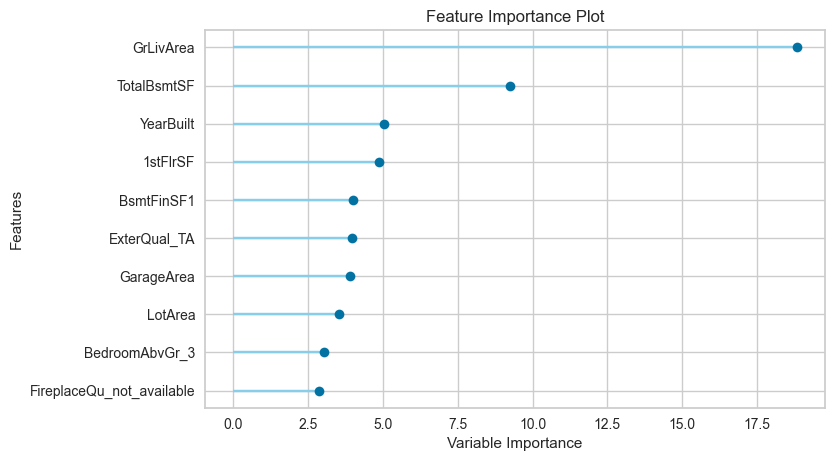

In [12]:
plot_model(tuned, plot='feature')

In [ ]:
reg = setup(df, target='SalePrice',transform_target=True,transformation=True, 
            imputation_type='iterative', 
            numeric_iterative_imputer='lightgbm', feature_interaction=True)

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,05:56:44
Status,. . . . . . . . . . . . . . . . . .,Preprocessing Data


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
Id,ID Column
MSSubClass,Categorical
MSZoning,Categorical
LotFrontage,Numeric
LotArea,Numeric
...,...
MoSold,Categorical
YrSold,Categorical
SaleType,Categorical
SaleCondition,Categorical


In [ ]:
models = compare_models()

In [ ]:
et = create_model('et')
rf = create_model('rf')
adaboost = create_model('gbc')
catboost = create_model('catboost')

In [ ]:
blender_specific = blend_models(estimator_list = [et,rf,adaboost,catboost], method = 'soft')